In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv('../data/uber_raw.csv')

In [21]:
df.info()
df.head()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [22]:
df.dropna(inplace=True)#Remove null values
df.drop_duplicates(inplace=True)#drop duplicates

In [23]:
df.to_csv('Uber_fares_clean.csv', index=False)

In [24]:
df.mean(numeric_only=True),df.median(numeric_only=True), df.mode()

(Unnamed: 0           2.771248e+07
 fare_amount          1.135989e+01
 pickup_longitude    -7.252763e+01
 pickup_latitude      3.993588e+01
 dropoff_longitude   -7.252529e+01
 dropoff_latitude     3.992389e+01
 passenger_count      1.684543e+00
 dtype: float64,
 Unnamed: 0           2.774524e+07
 fare_amount          8.500000e+00
 pickup_longitude    -7.398182e+01
 pickup_latitude      4.075259e+01
 dropoff_longitude   -7.398009e+01
 dropoff_latitude     4.075304e+01
 passenger_count      1.000000e+00
 dtype: float64,
         Unnamed: 0                          key  fare_amount  \
 0                1  2009-01-01 01:15:22.0000006          6.5   
 1               45  2009-01-01 01:59:17.0000001          NaN   
 2               48  2009-01-01 02:05:03.0000003          NaN   
 3              243  2009-01-01 02:09:13.0000003          NaN   
 4              335  2009-01-01 02:13:41.0000001          NaN   
 ...            ...                          ...          ...   
 199994    55421687  

In [25]:
df.describe(percentiles=[.25, .5, .75])

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2.771248e+07,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


#This part is for converting the coordinates into kilometers using the haversine formula explained here "https://en.wikipedia.org/wiki/Haversine_formula"

In [26]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the distance between 
    two points on the earth (specidied in deimal degrees) 
    Return distance in kilometers"""

    #Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    #The actual formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 #Earth radius in kilometers
    return c * r
#Apply to the dataframe
df['distance_km'] = df.apply(
    lambda row: haversine(
        row['pickup_latitude'],
        row['pickup_longitude'],
        row['dropoff_latitude'],
        row['dropoff_longitude']
    ), axis=1
)

In [27]:
df_clean = df.dropna(subset=[
    'pickup_latitude',
    'pickup_longitude',
    'dropoff_latitude',
    'dropoff_longitude',
    'fare_amount'
])
#Remove unrealistic distances
df_clean = df_clean[
    (df_clean['distance_km']>0)&
    (df_clean['distance_km']<100)
]
#Reset index
df_clean = df_clean.reset_index(drop=True)
df_clean.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


<Axes: xlabel='fare_amount', ylabel='Count'>

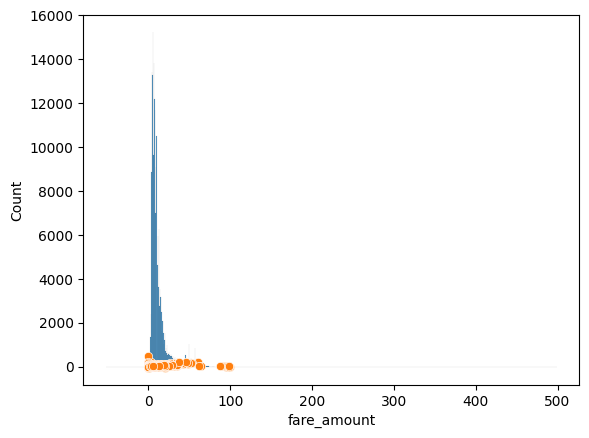

In [28]:
sns.histplot(df_clean['fare_amount'])
sns.scatterplot(x = 'distance_km', y = 'fare_amount', data = df_clean)

In [29]:
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])
df_clean['hour'] = df_clean['pickup_datetime'].dt.hour
df_clean['day'] = df_clean['pickup_datetime'].dt.day
df_clean['month'] = df_clean['pickup_datetime'].dt.month
df_clean['weekday'] = df_clean['pickup_datetime'].dt.day_name()

In [30]:
def peak_hour(hour):
    return 'Peak' if 7<=hour<=9 or 17<=hour<19 else 'Off-Peak'

df_clean['peak_offpeak'] = df_clean['hour'].apply(peak_hour)

In [31]:
df_clean.to_csv('uber_fare_enhanced.csv', index=False)